In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("DataPreprocessing/DataCleaned.csv")
dataset.head()

id  Member_number        Date   itemDescription
0   0           1808  21-07-2015    tropical fruit
1   1           2552  05-01-2015        whole milk
2   2           2300  19-09-2015         pip fruit
3   3           1187  12-12-2015  other vegetables
4   4           3037  01-02-2015        whole milk

In [3]:
dataset.info

<bound method DataFrame.info of           id  Member_number        Date        itemDescription
0          0           1808  21-07-2015         tropical fruit
1          1           2552  05-01-2015             whole milk
2          2           2300  19-09-2015              pip fruit
3          3           1187  12-12-2015       other vegetables
4          4           3037  01-02-2015             whole milk
...      ...            ...         ...                    ...
37269  38760           4471  08-10-2014          sliced cheese
37270  38761           2022  23-02-2014                  candy
37271  38762           1097  16-04-2014               cake bar
37272  38763           1510  03-12-2014  fruit/vegetable juice
37273  38764           1521  26-12-2014               cat food

[37274 rows x 4 columns]>

In [4]:
dataset.dtypes

id                  int64
Member_number       int64
Date               object
itemDescription    object
dtype: object

In [5]:
dataset.describe()

id  Member_number
count  37274.000000   37274.000000
mean   19417.376590    3003.073295
std    11189.230903    1153.727412
min        0.000000    1000.000000
25%     9792.250000    2001.000000
50%    19412.500000    3005.000000
75%    29118.750000    4007.000000
max    38764.000000    5000.000000

In [6]:
dataset.isnull().sum()

id                 0
Member_number      0
Date               0
itemDescription    0
dtype: int64

# Total Product Sold in Week, Month and Year

In [7]:
date = dataset["Date"].str.split(pat='-', expand=True)
dataset["Day"] = date[0]
dataset["Month"] = date[1]
dataset["Year"] = date[2]
dataset.head()

id  Member_number        Date   itemDescription Day Month  Year
0   0           1808  21-07-2015    tropical fruit  21    07  2015
1   1           2552  05-01-2015        whole milk  05    01  2015
2   2           2300  19-09-2015         pip fruit  19    09  2015
3   3           1187  12-12-2015  other vegetables  12    12  2015
4   4           3037  01-02-2015        whole milk  01    02  2015

In [8]:
# Convert month value to string
month_dict ={'01':'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', 
             '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug', 
             '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

# Apply the month_dict
dataset["Month"] = dataset["Month"].apply(lambda x: month_dict[x])
dataset.head()

id  Member_number        Date   itemDescription Day Month  Year
0   0           1808  21-07-2015    tropical fruit  21   Jul  2015
1   1           2552  05-01-2015        whole milk  05   Jan  2015
2   2           2300  19-09-2015         pip fruit  19   Sep  2015
3   3           1187  12-12-2015  other vegetables  12   Dec  2015
4   4           3037  01-02-2015        whole milk  01   Feb  2015

In [9]:
from datetime import datetime

date_format = '%d-%m-%Y'

# Convert to format time
dataset["Date"] = pd.to_datetime(dataset["Date"], format=date_format)
dataset["DayOfWeek"] = dataset["Date"].dt.strftime("%A")

# Distiguish weekday and weekend
dataset['WeekdayWeekend'] = dataset['DayOfWeek'].map(lambda x: 'weekend' if x in ['Saturday', 'Sunday'] else 'weekday')

# Show the data
dataset.head()

id  Member_number       Date   itemDescription Day Month  Year DayOfWeek  \
0   0           1808 2015-07-21    tropical fruit  21   Jul  2015   Tuesday   
1   1           2552 2015-01-05        whole milk  05   Jan  2015    Monday   
2   2           2300 2015-09-19         pip fruit  19   Sep  2015  Saturday   
3   3           1187 2015-12-12  other vegetables  12   Dec  2015  Saturday   
4   4           3037 2015-02-01        whole milk  01   Feb  2015    Sunday   

  WeekdayWeekend  
0        weekday  
1        weekday  
2        weekend  
3        weekend  
4        weekend

In [10]:
dataset.describe(include="all")

id  Member_number                           Date  \
count   37274.000000   37274.000000                          37274   
unique           NaN            NaN                            NaN   
top              NaN            NaN                            NaN   
freq             NaN            NaN                            NaN   
mean    19417.376590    3003.073295  2015-01-08 03:47:44.430970624   
min         0.000000    1000.000000            2014-01-01 00:00:00   
25%      9792.250000    2001.000000            2014-07-11 00:00:00   
50%     19412.500000    3005.000000            2015-01-17 00:00:00   
75%     29118.750000    4007.000000            2015-07-08 00:00:00   
max     38764.000000    5000.000000            2015-12-30 00:00:00   
std     11189.230903    1153.727412                            NaN   

       itemDescription    Day  Month   Year DayOfWeek WeekdayWeekend  
count            37274  37274  37274  37274     37274          37274  
unique             167     31     12      2         7              2  
top         whole milk     03    Aug   2015  Thursday        weekday  
freq              2232   1326   3368  19499      5404          26618  
mean               NaN    NaN    NaN    NaN       NaN            NaN  
min                NaN    NaN    NaN    NaN       NaN            NaN  
25%                NaN    NaN    NaN    NaN       NaN            NaN  
50%                NaN    NaN    NaN    NaN       NaN            NaN  
75%                NaN    NaN    NaN    NaN       NaN            NaN  
max                NaN    NaN    NaN    NaN       NaN            NaN  
std                NaN    NaN    NaN    NaN       NaN            NaN

In [11]:
item_count = dataset["itemDescription"].value_counts()
item_count

itemDescription
whole milk               2232
other vegetables         1760
rolls/buns               1580
soda                     1394
yogurt                   1238
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

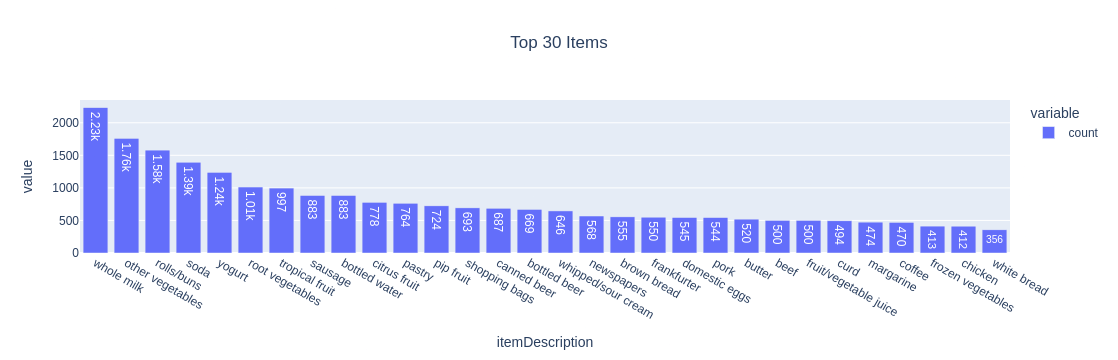

In [12]:
# Visualize the top item purchases
fig = px.bar(data_frame=item_count.head(30),
             title="Top 30 Items",
             text_auto=".3s",
             labels = {"index": "Items",
                       "values": "Quantities",
                       "lift": "Lift"})
fig.update_layout(title_x=0.5,
                  title_y=0.9)
fig.show()

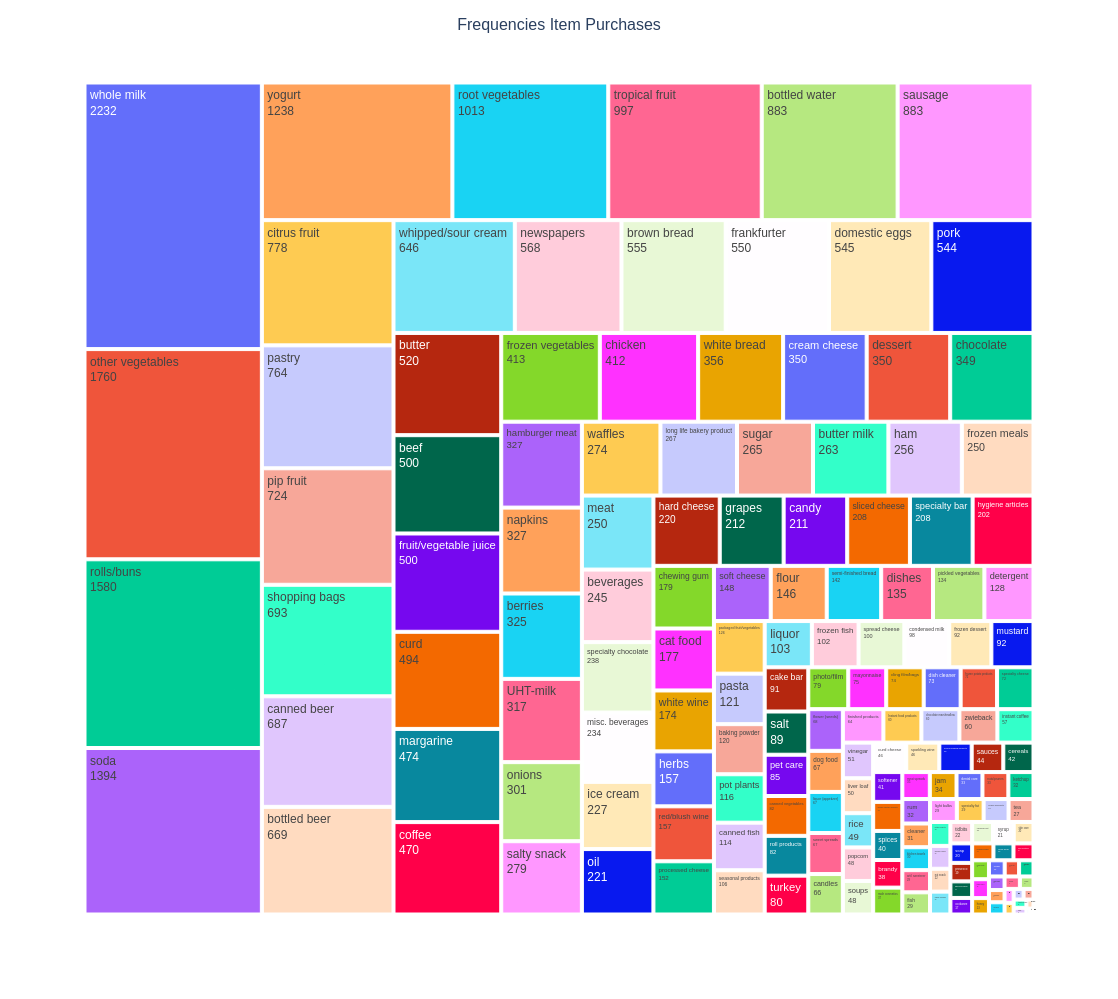

In [13]:
# Calculate the frequencies item
freq_of_item = dataset.groupby(pd.Grouper(key="itemDescription")).size().reset_index(name="count")

# Visualize the frequencies
fig = px.treemap(freq_of_item, path=["itemDescription"], values="count")

# Set the layout
fig.update_layout(title_text="Frequencies Item Purchases",
                  title_x=0.5,
                  title_font=dict(size=16),
                  height=999)
fig.update_traces(textinfo="label + value")

# Show the plot
fig.show()

In [14]:
# Calculate the total product sales
# Per Week
DataWeek = dataset.groupby(["DayOfWeek", "Year"])["itemDescription"].count().reset_index()
DataWeek.sort_values(by="itemDescription", ascending=False)

DayOfWeek  Year  itemDescription
13  Wednesday  2015             2894
7      Sunday  2015             2857
1      Friday  2015             2851
11    Tuesday  2015             2757
5    Saturday  2015             2745
9    Thursday  2015             2740
8    Thursday  2014             2664
3      Monday  2015             2655
4    Saturday  2014             2596
10    Tuesday  2014             2555
2      Monday  2014             2521
0      Friday  2014             2492
12  Wednesday  2014             2489
6      Sunday  2014             2458

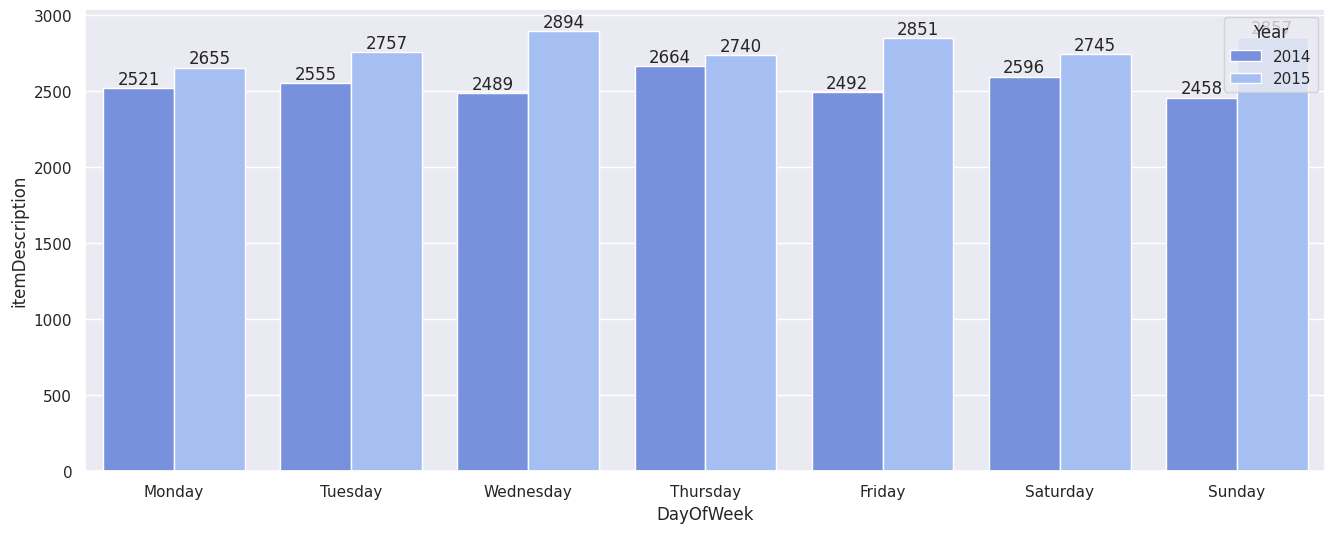

<Figure size 640x480 with 0 Axes>

In [63]:
# Visualize
fig = plt.figure(figsize=(16, 6))
from pandas.api.types import CategoricalDtype
week_ordered = CategoricalDtype(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

# Adjust the data
DataWeek["DayOfWeek"] = DataWeek["DayOfWeek"].astype(week_ordered)
DataWeek = DataWeek.sort_values(by="DayOfWeek")

# Adjust the plot
colors = sns.color_palette("coolwarm")
ax = sns.barplot(data = DataWeek, 
                 x = "DayOfWeek",
                 y = "itemDescription",
                 hue = "Year",
                 palette = colors)

# Show the plot
for i in ax.containers:
    ax.bar_label(i)
plt.show()
plt.savefig('DayOfWeek.png')

In [16]:
# Per Month
DataMonth = dataset.groupby(["Month", "Year"])["itemDescription"].count().reset_index()

DataMonth.sort_values(by="itemDescription", ascending=False)

Month  Year  itemDescription
3    Aug  2015             1831
17   May  2015             1716
9    Jan  2015             1707
19   Nov  2015             1689
11   Jul  2015             1643
1    Apr  2015             1624
15   Mar  2015             1623
13   Jun  2015             1622
21   Oct  2015             1585
16   May  2014             1575
20   Oct  2014             1561
10   Jul  2014             1538
2    Aug  2014             1537
12   Jun  2014             1532
23   Sep  2015             1508
0    Apr  2014             1505
7    Feb  2015             1476
5    Dec  2015             1475
8    Jan  2014             1472
18   Nov  2014             1445
22   Sep  2014             1438
4    Dec  2014             1433
6    Feb  2014             1382
14   Mar  2014             1357

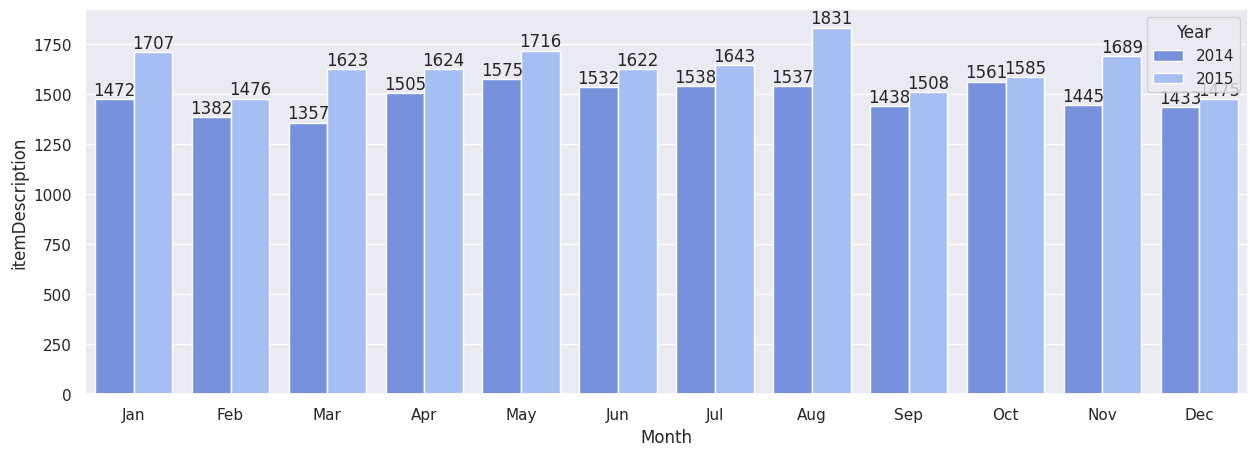

<Figure size 640x480 with 0 Axes>

In [64]:
# Total product sales by Months
plt.figure(figsize = (15, 5))
months_ordered = CategoricalDtype(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Adjust the data
DataMonth['Month'] = DataMonth['Month'].astype(months_ordered)
DataMonth = DataMonth.sort_values(by = 'Month')

# Adjust the plot
ax = sns.barplot(data = DataMonth,
                 x = 'Month', 
                 y = 'itemDescription', 
                 hue = 'Year', 
                 palette = colors)

# Show the plot
for i in ax.containers:
     ax.bar_label(i)
plt.show()  
plt.savefig('Month.png')

In [18]:
# Per Year
DataYear = dataset.groupby("Year")["itemDescription"].count().reset_index()

DataYear

Year  itemDescription
0  2014            17775
1  2015            19499

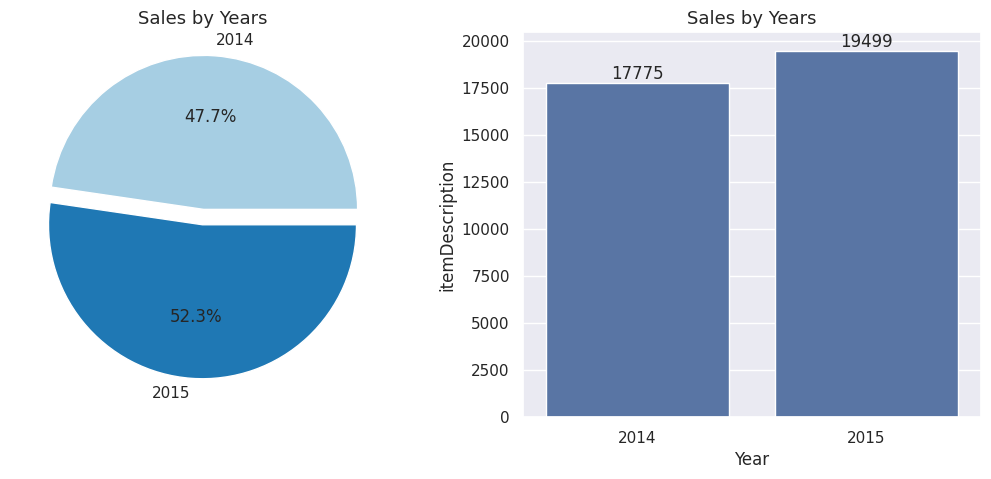

In [68]:
datayearsy = DataYear['Year'].tolist()
dataitem = DataYear['itemDescription'].tolist()

# Pier chart
plt.figure(figsize = (13, 5))
plt.subplot(1, 2, 1)
explode = (0.1, 0)
colors = sns.color_palette('Paired')
plt.pie(dataitem,
        labels = datayearsy, 
        autopct = '%1.1f%%', 
        explode = explode,
        colors=colors)
plt.title('Sales by Years', size = 13)


# Bar chart
plt.subplot(1, 2, 2)
ax=sns.barplot(data = DataYear,
               x = 'Year', 
               y = 'itemDescription',
               pallete='Paired')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Sales by Years', size = 13)    
plt.show()


# TimeSeries Analysis

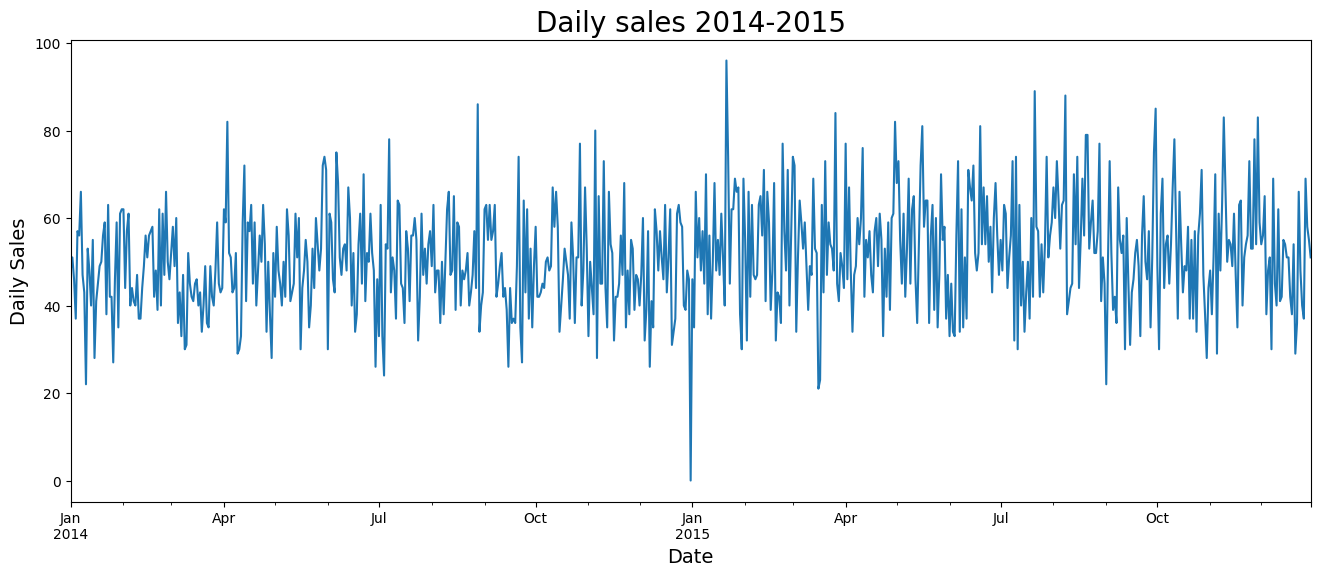

In [20]:
# Make a copy and set Date as index
df = dataset.copy()
df.set_index("Date", inplace=True)

# Visualize using line graph
df.resample("D")[["itemDescription"]].count().plot(kind="line", figsize=(16, 6), legend=None)
plt.title("Daily sales 2014-2015", fontsize=20)
plt.ylabel("Daily Sales", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.show()

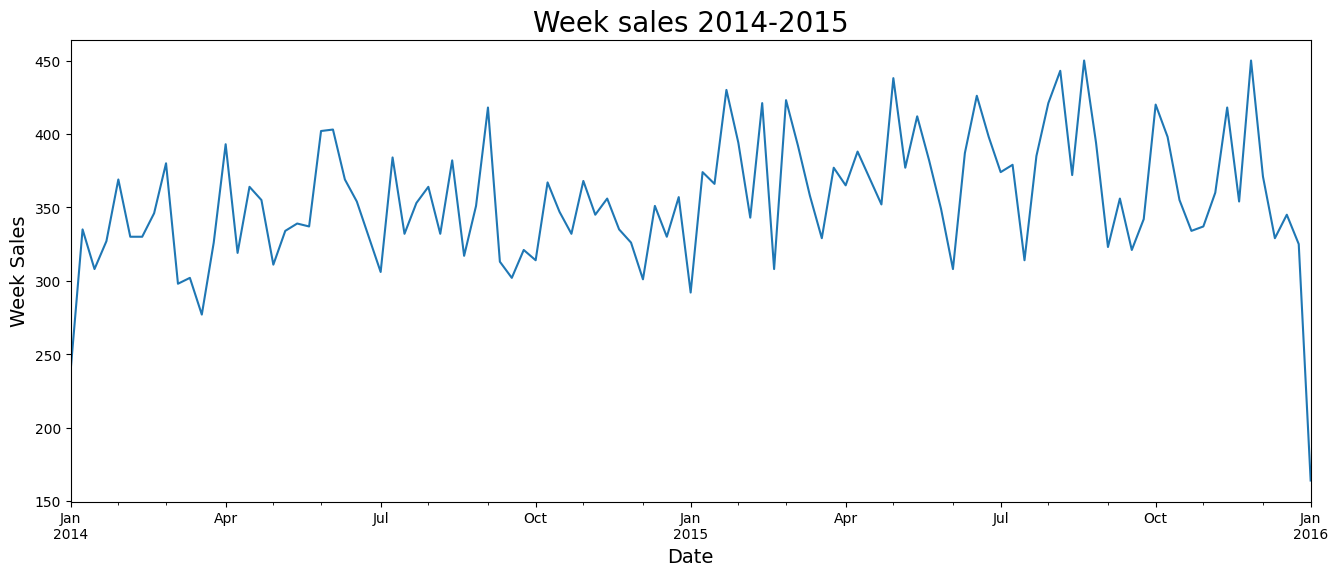

In [21]:
# Make a copy and set Date as index
df = dataset.copy()
df.set_index("Date", inplace=True)

# Visualize using line graph
df.resample("W")[["itemDescription"]].count().plot(kind="line", figsize=(16, 6), legend=None)
plt.title("Week sales 2014-2015", fontsize=20)
plt.ylabel("Week Sales", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.show()

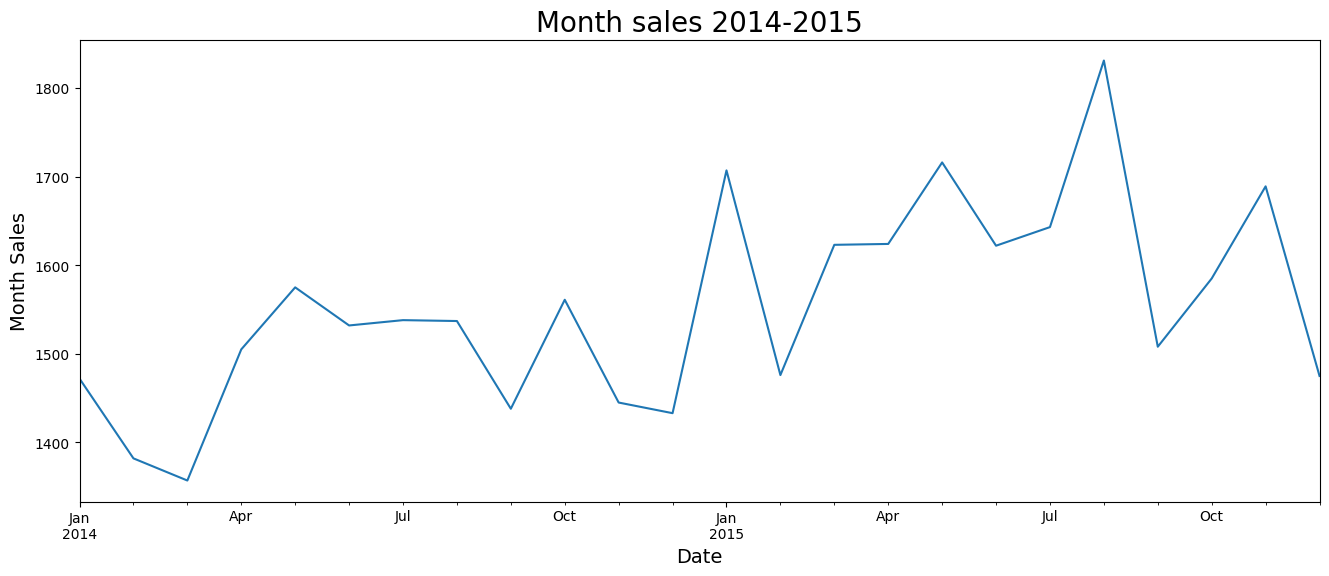

In [22]:
# Make a copy and set Date as index
df = dataset.copy()
df.set_index("Date", inplace=True)

# Visualize using line graph
df.resample("M")[["itemDescription"]].count().plot(kind="line", figsize=(16, 6), legend=None)
plt.title("Month sales 2014-2015", fontsize=20)
plt.ylabel("Month Sales", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.show()

In [23]:
# Split the data into 2014 and 2015 for easily understanding
TotalWeek = df.groupby(["Year", "DayOfWeek"], as_index=False).agg(Sales=("itemDescription", "count"))
TotalWeek

Year  DayOfWeek  Sales
0   2014     Friday   2492
1   2014     Monday   2521
2   2014   Saturday   2596
3   2014     Sunday   2458
4   2014   Thursday   2664
5   2014    Tuesday   2555
6   2014  Wednesday   2489
7   2015     Friday   2851
8   2015     Monday   2655
9   2015   Saturday   2745
10  2015     Sunday   2857
11  2015   Thursday   2740
12  2015    Tuesday   2757
13  2015  Wednesday   2894

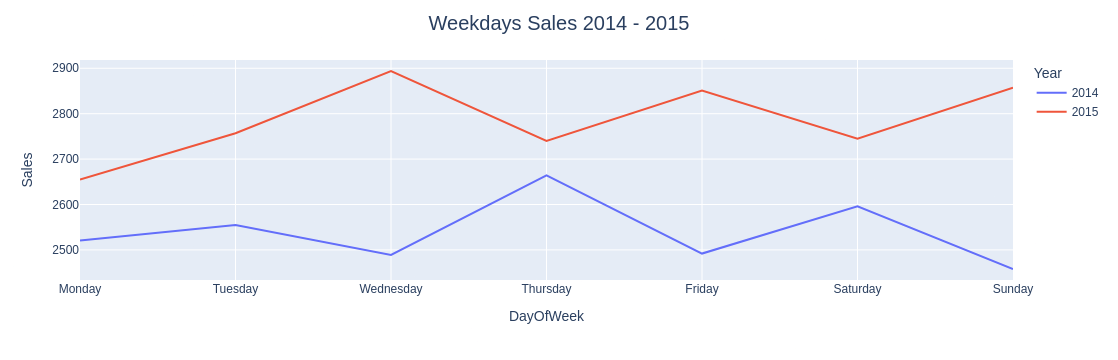

In [24]:
# Adjust the data
order_days = CategoricalDtype(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
TotalWeek["DayOfWeek"] = TotalWeek["DayOfWeek"].astype(order_days)
TotalWeek = TotalWeek.sort_values(by="DayOfWeek")

# Adjust the plot
fig = px.line(TotalWeek,
              x="DayOfWeek",
              y="Sales",
              color="Year")

# Set the title
fig.update_layout(title_text="Weekdays Sales 2014 - 2015",
                  title_x=0.5,
                  title={"font": {"size":20}}) 

In [25]:
# Split the data into 2014 and 2015 for easily understanding
TotalMonth = df.groupby(["Year", "Month"], as_index=False).agg(Sales=("itemDescription", "count"))
TotalMonth.head()

Year Month  Sales
0  2014   Apr   1505
1  2014   Aug   1537
2  2014   Dec   1433
3  2014   Feb   1382
4  2014   Jan   1472

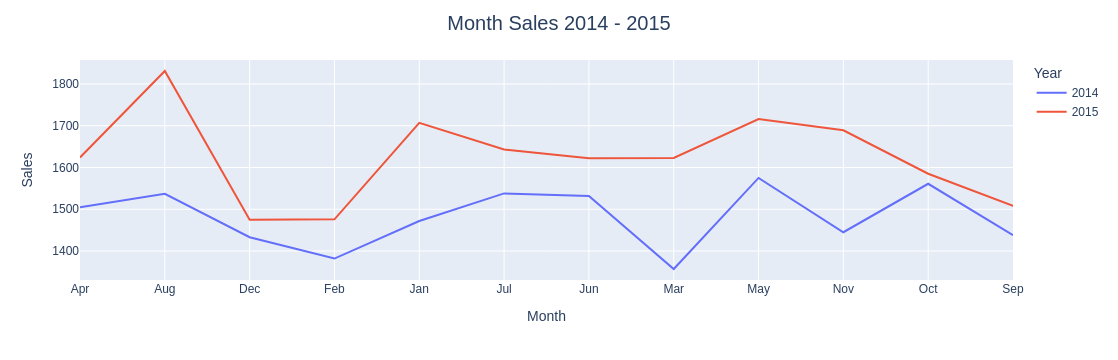

In [26]:
# Adjust the data
months_ordered = CategoricalDtype(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
TotalMonth["Month"] = TotalMonth["Month"].astype(months_ordered)
TotalWeek = TotalMonth.sort_values(by="Month")

# Adjust the plot
fig = px.line(TotalMonth,
              x="Month",
              y="Sales",
              color="Year")

# Set the title
fig.update_layout(title_text="Month Sales 2014 - 2015",
                  title_x=0.5,
                  title={"font": {"size":20}}) 

In [27]:
TotalDaily = df.groupby(["Year", "Day"], as_index=False).agg(Sales=("itemDescription", "count"))
TotalDaily.head()

Year Day  Sales
0  2014  01    571
1  2014  02    659
2  2014  03    618
3  2014  04    549
4  2014  05    588

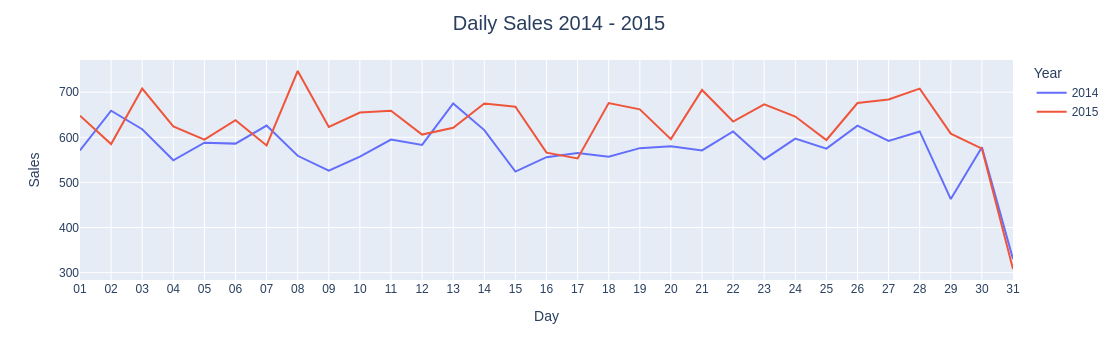

In [28]:
# Adjust the plot
fig = px.line(TotalDaily,
              x="Day",
              y="Sales",
              color="Year")

# Set the title
fig.update_layout(title_text="Daily Sales 2014 - 2015",
                  title_x=0.5,
                  title={"font": {"size":20}}) 

# Market Basket Analysis

In [29]:
df.head()

id  Member_number   itemDescription Day Month  Year DayOfWeek  \
Date                                                                        
2015-07-21   0           1808    tropical fruit  21   Jul  2015   Tuesday   
2015-01-05   1           2552        whole milk  05   Jan  2015    Monday   
2015-09-19   2           2300         pip fruit  19   Sep  2015  Saturday   
2015-12-12   3           1187  other vegetables  12   Dec  2015  Saturday   
2015-02-01   4           3037        whole milk  01   Feb  2015    Sunday   

           WeekdayWeekend  
Date                       
2015-07-21        weekday  
2015-01-05        weekday  
2015-09-19        weekend  
2015-12-12        weekend  
2015-02-01        weekend

In [30]:
df["Member_number"] = df["Member_number"].astype(str)
df["itemDescription"] = df["itemDescription"].str.strip()
df.head()

id Member_number   itemDescription Day Month  Year DayOfWeek  \
Date                                                                       
2015-07-21   0          1808    tropical fruit  21   Jul  2015   Tuesday   
2015-01-05   1          2552        whole milk  05   Jan  2015    Monday   
2015-09-19   2          2300         pip fruit  19   Sep  2015  Saturday   
2015-12-12   3          1187  other vegetables  12   Dec  2015  Saturday   
2015-02-01   4          3037        whole milk  01   Feb  2015    Sunday   

           WeekdayWeekend  
Date                       
2015-07-21        weekday  
2015-01-05        weekday  
2015-09-19        weekend  
2015-12-12        weekend  
2015-02-01        weekend

In [31]:
df.shape

(37274, 8)

In [32]:
# Create a matrix
basket_matrix = (df.groupby(["Member_number", "itemDescription"])["itemDescription"].count().unstack().fillna(0).reset_index())
basket_matrix = basket_matrix.drop("Member_number", axis=1)
basket_matrix.head()

itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
0                                  0.0       0.0               0.0   
1                                  0.0       0.0               0.0   
2                                  0.0       0.0               0.0   
3                                  0.0       0.0               0.0   
4                                  0.0       0.0               0.0   

itemDescription  artif. sweetener  baby cosmetics  bags  baking powder  \
0                             0.0             0.0   0.0            0.0   
1                             0.0             0.0   0.0            0.0   
2                             0.0             0.0   0.0            0.0   
3                             0.0             0.0   0.0            0.0   
4                             0.0             0.0   0.0            0.0   

itemDescription  bathroom cleaner  beef  berries  ...  turkey  vinegar  \
0                             0.0   0.0      0.0  ...     0.0      0.0   
1                             0.0   1.0      0.0  ...     0.0      0.0   
2                             0.0   0.0      0.0  ...     0.0      0.0   
3                             0.0   0.0      0.0  ...     0.0      0.0   
4                             0.0   0.0      0.0  ...     0.0      0.0   

itemDescription  waffles  whipped/sour cream  whisky  white bread  white wine  \
0                    0.0                 0.0     0.0          0.0         0.0   
1                    0.0                 1.0     0.0          1.0         0.0   
2                    0.0                 0.0     0.0          0.0         0.0   
3                    0.0                 0.0     0.0          0.0         0.0   
4                    0.0                 0.0     0.0          0.0         0.0   

itemDescription  whole milk  yogurt  zwieback  
0                       2.0     1.0       0.0  
1                       2.0     0.0       0.0  
2                       1.0     0.0       0.0  
3                       0.0     0.0       0.0  
4                       3.0     0.0       0.0  

[5 rows x 167 columns]

In [33]:
basket_matrix.shape

(3892, 167)

In [34]:
basket_sets = basket_matrix.applymap(lambda x: 1 if x >= 1 else 0)
basket_sets

itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
0                                    0         0                 0   
1                                    0         0                 0   
2                                    0         0                 0   
3                                    0         0                 0   
4                                    0         0                 0   
...                                ...       ...               ...   
3887                                 0         0                 0   
3888                                 0         0                 0   
3889                                 0         0                 0   
3890                                 0         0                 0   
3891                                 0         0                 0   

itemDescription  artif. sweetener  baby cosmetics  bags  baking powder  \
0                               0               0     0              0   
1                               0               0     0              0   
2                               0               0     0              0   
3                               0               0     0              0   
4                               0               0     0              0   
...                           ...             ...   ...            ...   
3887                            0               0     0              0   
3888                            0               0     0              0   
3889                            0               0     0              0   
3890                            0               0     0              0   
3891                            0               0     0              0   

itemDescription  bathroom cleaner  beef  berries  ...  turkey  vinegar  \
0                               0     0        0  ...       0        0   
1                               0     1        0  ...       0        0   
2                               0     0        0  ...       0        0   
3                               0     0        0  ...       0        0   
4                               0     0        0  ...       0        0   
...                           ...   ...      ...  ...     ...      ...   
3887                            0     0        0  ...       0        0   
3888                            0     0        0  ...       0        0   
3889                            0     0        0  ...       0        0   
3890                            0     0        1  ...       0        0   
3891                            0     0        0  ...       0        0   

itemDescription  waffles  whipped/sour cream  whisky  white bread  white wine  \
0                      0                   0       0            0           0   
1                      0                   1       0            1           0   
2                      0                   0       0            0           0   
3                      0                   0       0            0           0   
4                      0                   0       0            0           0   
...                  ...                 ...     ...          ...         ...   
3887                   0                   0       0            0           0   
3888                   0                   0       0            0           1   
3889                   0                   0       0            0           0   
3890                   0                   1       0            0           0   
3891                   0                   0       0            0           0   

itemDescription  whole milk  yogurt  zwieback  
0                         1       1         0  
1                         1       0         0  
2                         1       0         0  
3                         0       0         0  
4                         1       0         0  
...                     ...     ...       ...  
3887                      0       0         0  
3888                    

In [35]:
unique_customers = len(df['Member_number'].unique())
unique_itens = len(df['itemDescription'].unique())
print('There are', unique_customers, 'unique customers')
print('There are', unique_itens, 'unique grocery item')


There are 3892 unique customers
There are 167 unique grocery item


In [36]:
transactions = [a[1]['itemDescription'].tolist() for a in list(df.groupby(['Member_number','Date']))]
all_transactions = len(transactions)
print(f'There are {all_transactions} unique transactions')

There are 14757 unique transactions


In [37]:
from mlxtend.frequent_patterns import apriori, association_rules
import time

# Supress the warning
import warnings
warnings.filterwarnings("ignore")

In [38]:
# Start the timer
StartTime = time.time()

# Calculate the support
frequent_item = apriori(basket_sets, min_support=0.01, use_colnames=True)

# End the timer
EndTime= time.time()

# Calculate time apriori execution took
TotalTime = EndTime - StartTime
print(f"The Apriori Execution Took: {TotalTime} seconds")

The Apriori Execution Took: 3.1839723587036133 seconds


In [39]:
frequent_item.sort_values(by="support", ascending=False)

support                                           itemsets
113   0.438592                                       (whole milk)
69    0.366393                                 (other vegetables)
84    0.338643                                       (rolls/buns)
94    0.301901                                             (soda)
114   0.274923                                           (yogurt)
...        ...                                                ...
216   0.010021                            (beverages, newspapers)
1816  0.010021            (citrus fruit, tropical fruit, sausage)
1828  0.010021            (citrus fruit, whole milk, white bread)
2702  0.010021  (tropical fruit, sausage, whole milk, rolls/buns)
215   0.010021                                  (beverages, curd)

[2727 rows x 2 columns]

In [40]:
market_rules = association_rules(frequent_item, metric="lift", min_threshold=1)
market_rules.sort_values(by="lift", ascending=False)

antecedents  \
12876                     (yogurt, rolls/buns)   
12857  (sausage, whole milk, other vegetables)   
12868                    (sausage, whole milk)   
12865   (yogurt, rolls/buns, other vegetables)   
12860        (sausage, whole milk, rolls/buns)   
...                                        ...   
1201                            (frozen meals)   
1631                          (tropical fruit)   
1630                                  (onions)   
1527                         (misc. beverages)   
1526                              (whole milk)   

                                   consequents  antecedent support  \
12876  (sausage, whole milk, other vegetables)            0.104830   
12857                     (yogurt, rolls/buns)            0.045992   
12868   (yogurt, rolls/buns, other vegetables)            0.100719   
12865                    (sausage, whole milk)            0.048561   
12860               (yogurt, other vegetables)            0.044707   
...                                        ...                 ...   
1201                         (root vegetables)            0.062693   
1631                                  (onions)            0.230473   
1630                          (tropical fruit)            0.075797   
1527                              (whole milk)            0.058582   
1526                         (misc. beverages)            0.438592   

       consequent support   support  confidence      lift      leverage  \
12876            0.045992  0.012590    0.120098  2.611294  7.768591e-03   
12857            0.104830  0.012590    0.273743  2.611294  7.768591e-03   
12868            0.048561  0.012590    0.125000  2.574074  7.698877e-03   
12865            0.100719  0.012590    0.259259  2.574074  7.698877e-03   
12860            0.115879  0.012590    0.281609  2.430206  7.409327e-03   
...                   ...       ...         ...       ...           ...   
1201             0.225334  0.014132    0.225410  1.000336  4.753208e-06   
1631             0.075797  0.017472    0.075808  1.000155  2.706688e-06   
1630             0.230473  0.017472    0.230508  1.000155  2.706688e-06   
1527             0.438592  0.025694    0.438596  1.000010  2.640671e-07   
1526             0.058582  0.025694    0.058582  1.000010  2.640671e-07   

       conviction  zhangs_metric  
12876    1.084221       0.689309  
12857    1.232580       0.646795  
12868    1.087359       0.680000  
12865    1.214029       0.642722  
12860    1.230697       0.616054  
...           ...            ...  
1201     1.000098       0.000359  
1631     1.000013       0.000201  
1630     1.000046       0.000168  
1527     1.000008       0.000011  
1526     1.000001       0.000018  

[12912 rows x 10 columns]

In [41]:
pd.DataFrame.iteritems = pd.DataFrame.items
market_rules_sorted = market_rules[(market_rules["lift"]>=2)]
market_rules_sorted.sort_values(by="lift", ascending=False)

antecedents  \
12876                         (yogurt, rolls/buns)   
12857      (sausage, whole milk, other vegetables)   
12865       (yogurt, rolls/buns, other vegetables)   
12868                        (sausage, whole milk)   
12860            (sausage, whole milk, rolls/buns)   
12873                   (yogurt, other vegetables)   
12864       (yogurt, whole milk, other vegetables)   
12869                        (sausage, rolls/buns)   
12867                  (sausage, other vegetables)   
12866             (yogurt, whole milk, rolls/buns)   
10490            (shopping bags, other vegetables)   
10487                    (brown bread, whole milk)   
12858      (sausage, rolls/buns, other vegetables)   
12875                         (yogurt, whole milk)   
12863   (rolls/buns, whole milk, other vegetables)   
12870                            (yogurt, sausage)   
12803                        (sausage, whole milk)   
12802                 (yogurt, whipped/sour cream)   
12272                          (yogurt, pip fruit)   
12277                         (pastry, whole milk)   
12861                (yogurt, sausage, whole milk)   
12872               (rolls/buns, other vegetables)   
12874                     (whole milk, rolls/buns)   
12859          (yogurt, sausage, other vegetables)   
10000                     (curd, other vegetables)   
9997                   (bottled water, whole milk)   
12276                      (pip fruit, whole milk)   
12273                             (yogurt, pastry)   
9998             (bottled water, other vegetables)   
9999                            (curd, whole milk)   
12862                (yogurt, sausage, rolls/buns)   
12871               (whole milk, other vegetables)   
10488              (brown bread, other vegetables)   
10489                  (shopping bags, whole milk)   
10012            (bottled water, other vegetables)   
10013                    (frankfurter, whole milk)   
12529                        (sausage, rolls/buns)   
12524                               (yogurt, soda)   
12262                         (pastry, rolls/buns)   
12259                      (pip fruit, whole milk)   
12147                      (yogurt, shopping bags)   
12150                     (soda, other vegetables)   
11773                   (yogurt, other vegetables)   
11776                        (sausage, rolls/buns)   
3893                                 (canned beer)   
3888                         (pastry, brown bread)   
12261                         (pastry, whole milk)   
12260                      (pip fruit, rolls/buns)   
10484  (brown bread, whole milk, other vegetables)   
10493                              (shopping bags)   
11105                     (whole milk, rolls/buns)   
11100                     (domestic eggs, sausage)   
10616                (root vegetables, rolls/buns)   
10613              (canned beer, other vegetables)   
9995          (curd, whole milk, other vegetables)   
10002                              (bottled water)   
3891                                 (brown bread)   
3890                         (pastry, canned beer)   

                                       consequents  antecedent support  \
12876      (sausage, whole milk, other vegetables)            0.104830   
12857                         (yogurt, rolls/buns)            0.045992   
12865                        (sausage, whole milk)            0.048561   
12868       (yogurt, rolls/buns, other vegetables)            0.100719   
12860                   (yogurt, other vegetables)            0.044707   
12873            (sausage, whole milk, rolls/buns)            0.115879   
12864                        (sausage, rolls/buns)            0.067831   
12869       (yogurt, whole milk, other vegetables)            0.077081   
12867             (yogurt, whole milk, rolls/buns)            0.088386   
12866                  (sausage, other vegetables)            0.059609   
10490                    (brown bread,

In [42]:
# Sort the value by lift >= 2 and confidence >= 0.35
market_rules_sorted = market_rules[(market_rules["lift"]>=2) & (market_rules["confidence"]>=0.35) ]
market_rules_sorted.sort_values(by="lift", ascending=False).reset_index(drop=True)

antecedents                     consequents  \
0   (yogurt, sausage, other vegetables)        (whole milk, rolls/buns)   
1         (yogurt, sausage, rolls/buns)  (whole milk, other vegetables)   
2  (curd, whole milk, other vegetables)                 (bottled water)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.034687            0.166238  0.012590    0.362963  2.183388   
1            0.033145            0.179856  0.012590    0.379845  2.111938   
2            0.027492            0.208633  0.011562    0.420561  2.015791   

   leverage  conviction  zhangs_metric  
0  0.006824    1.308812       0.561472  
1  0.006629    1.322482       0.544550  
2  0.005826    1.365746       0.518162

In [43]:
# Print the highest lift product
print(f"Total sales for Rolls/Buns: {basket_sets['rolls/buns'].sum()} pieces")
print(f"Total sales for Other Vegetables: {basket_sets['other vegetables'].sum()} pieces")
print(f"Total sales for Bottled Water: {basket_sets['bottled water'].sum()} pieces")
print(f"Total sales for Whole Milk: {basket_sets['whole milk'].sum()} pieces")
print(f"Total sales for Yogour: {basket_sets['yogurt'].sum()} pieces")

Total sales for Rolls/Buns: 1318 pieces
Total sales for Other Vegetables: 1426 pieces
Total sales for Bottled Water: 812 pieces
Total sales for Whole Milk: 1707 pieces
Total sales for Yogour: 1070 pieces


In [44]:
# Sort the value by lift >= 1 and confidence >= 0.70
market_rules_sorted2 = market_rules[(market_rules["lift"]>=1) & (market_rules["confidence"]>=0.70) ]
market_rules_sorted2.sort_values(by="lift", ascending=False).reset_index(drop=True)

antecedents   consequents  \
0              (chocolate, fruit/vegetable juice)  (whole milk)   
1            (domestic eggs, sausage, rolls/buns)  (whole milk)   
2  (bottled water, brown bread, other vegetables)  (whole milk)   
3                          (cream cheese, butter)  (whole milk)   
4              (yogurt, bottled beer, rolls/buns)  (whole milk)   
5           (yogurt, sausage, whipped/sour cream)  (whole milk)   
6              (yogurt, pastry, other vegetables)  (whole milk)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.013875            0.438592  0.010021    0.722222  1.646684   
1            0.013875            0.438592  0.010021    0.722222  1.646684   
2            0.016187            0.438592  0.011562    0.714286  1.628588   
3            0.014902            0.438592  0.010534    0.706897  1.611741   
4            0.018243            0.438592  0.012847    0.704225  1.605650   
5            0.014645            0.438592  0.010277    0.701754  1.600016   
6            0.024923            0.438592  0.017472    0.701031  1.598367   

   leverage  conviction  zhangs_metric  
0  0.003935    2.021069       0.398244  
1  0.003935    2.021069       0.398244  
2  0.004463    1.964928       0.392322  
3  0.003998    1.915392       0.385295  
4  0.004846    1.898094       0.384208  
5  0.003854    1.882368       0.380580  
6  0.006541    1.877813       0.383930

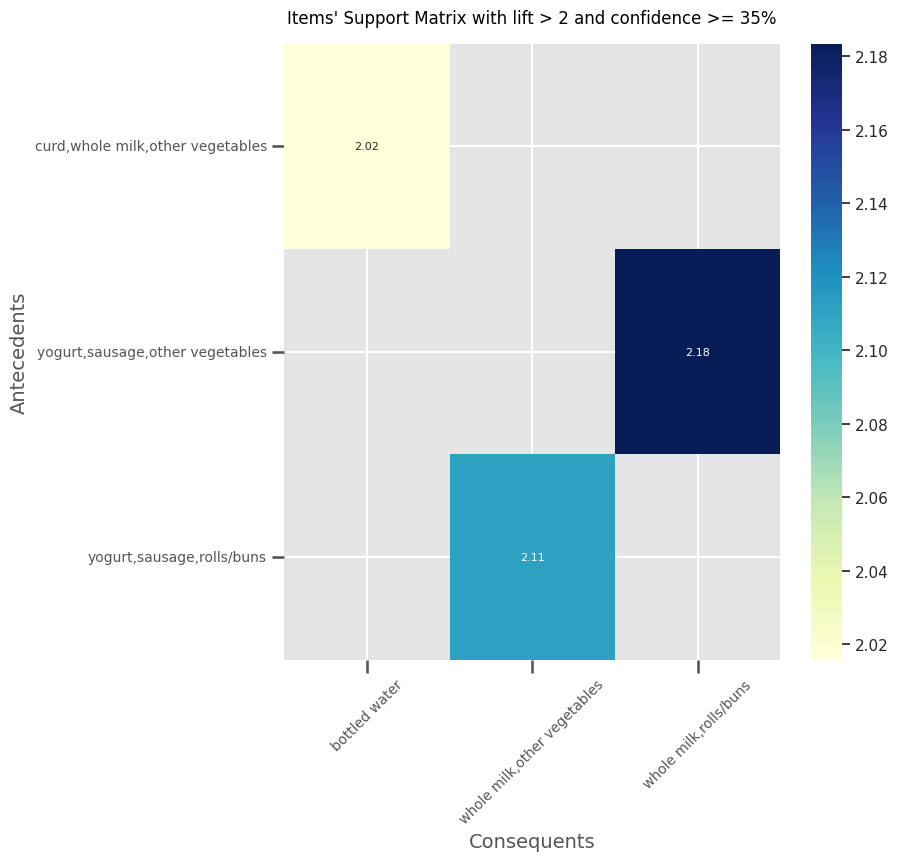

In [45]:
# Visualize
# plot a heatmap to know how strong the association is based on lift values
market_rules_sorted['lhs items'] = market_rules_sorted['antecedents'].apply(lambda x:len(x) )
market_rules_sorted[market_rules_sorted['lhs items'] >=2 ].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
market_rules_sorted['antecedents_'] = market_rules_sorted['antecedents'].apply(lambda a: ','.join(list(a)))
market_rules_sorted['consequents_'] = market_rules_sorted['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = market_rules_sorted[market_rules_sorted['lhs items']>2].pivot(index = 'antecedents_', 
                            columns = 'consequents_', values= 'lift')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(8, 8))
sns.set()

# Adjust the plot
ax = sns.heatmap(data=pivot, 
                 annot=True, 
                 fmt='.2f', 
                 cmap='YlGnBu', 
                 cbar=True, 
                 annot_kws={"fontsize": 8})
plt.title("Items' Support Matrix with lift > 2 and confidence >= 35%", 
          fontsize=12, 
          y=1.02)
ax.set_xlabel("Consequents",fontsize=14)
ax.set_ylabel("Antecedents",fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show() 

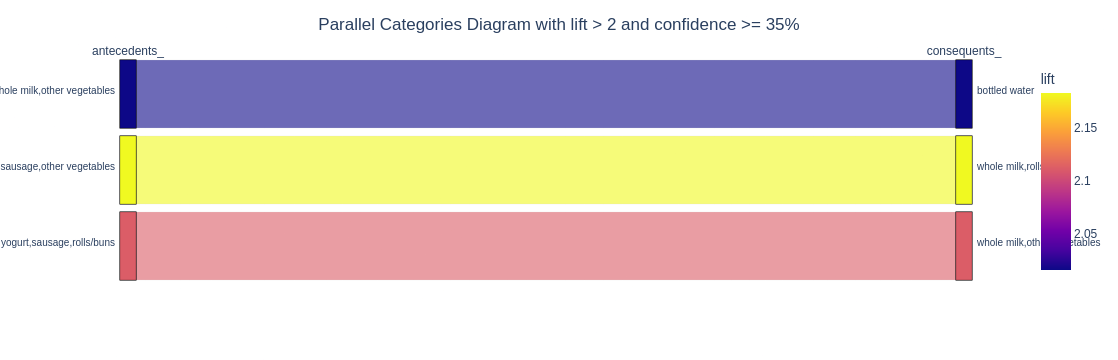

In [46]:
# Replace frozen sets with strings
market_rules_sorted['antecedents_'] = market_rules_sorted['antecedents'].apply(lambda a: ','.join(list(a)))
market_rules_sorted['consequents_'] = market_rules_sorted['consequents'].apply(lambda a: ','.join(list(a)))

# Adjust the plot
fig = px.parallel_categories(market_rules_sorted, 
                             dimensions=['antecedents_', 'consequents_'], 
                             color='lift')

# Update the layout
fig.update_layout(
    title='Parallel Categories Diagram with lift > 2 and confidence >= 35%',
    title_x=0.5,
    font=dict(size=12)
)

# Show the plot
fig.show()

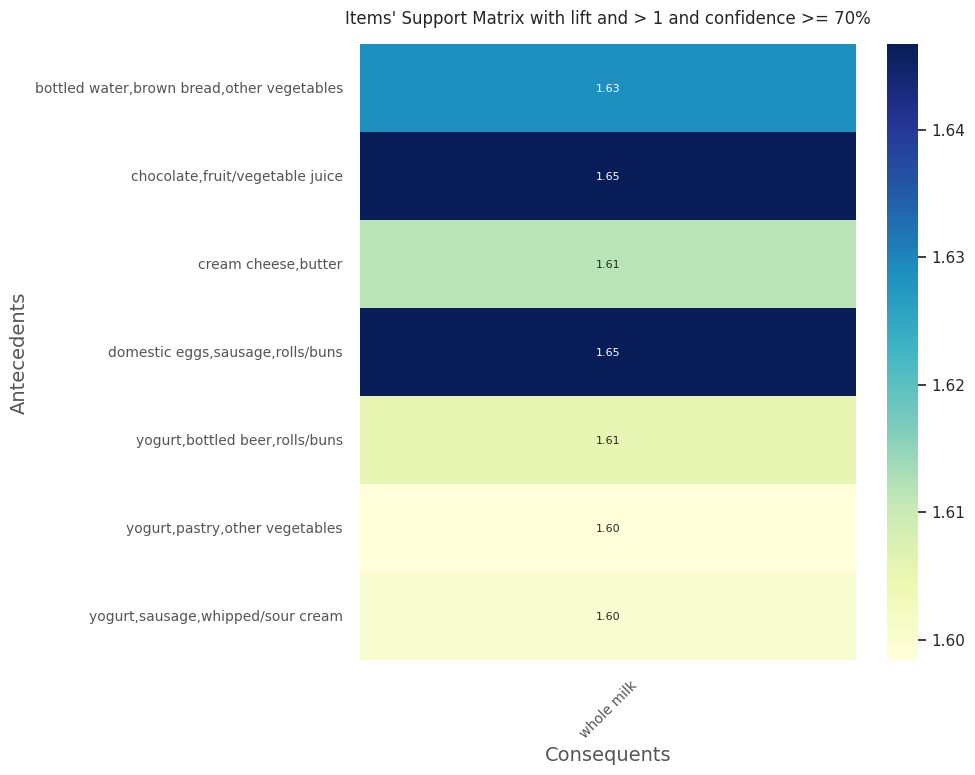

In [47]:
# plot a heatmap to know how strong the association is based on lift values
market_rules_sorted2['lhs items'] = market_rules_sorted2['antecedents'].apply(lambda x:len(x) )
market_rules_sorted2[market_rules_sorted2['lhs items'] >=1 ].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
market_rules_sorted2['antecedents_'] = market_rules_sorted2['antecedents'].apply(lambda a: ','.join(list(a)))
market_rules_sorted2['consequents_'] = market_rules_sorted2['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = market_rules_sorted2[market_rules_sorted2['lhs items']>1].pivot(index = 'antecedents_', 
                        columns = 'consequents_', values= 'lift')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(8, 8))
sns.set()
ax = sns.heatmap(data=pivot, 
                 annot=True, 
                 fmt='.2f', 
                 cmap='YlGnBu', 
                 cbar=True, 
                 annot_kws={"fontsize": 8})
plt.title("Items' Support Matrix with lift and > 1 and confidence >= 70%", 
          fontsize=12, 
          y=1.02)
ax.set_xlabel("Consequents",fontsize=14)
ax.set_ylabel("Antecedents",fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show() 

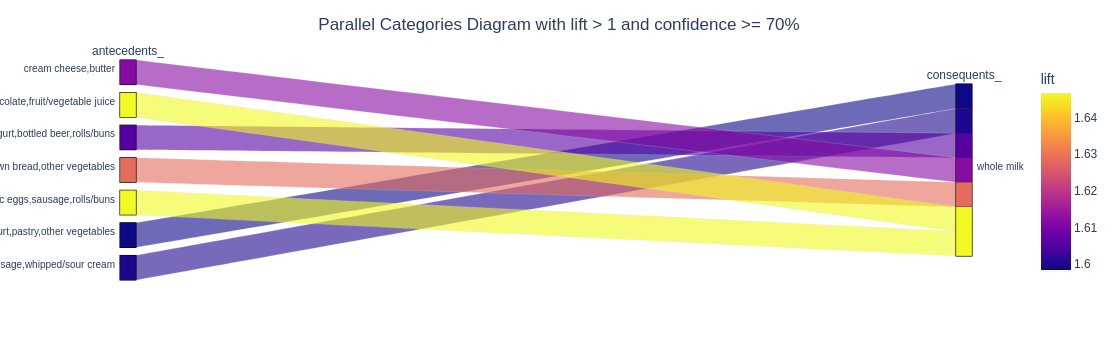

In [48]:
# Replace frozen sets with strings
market_rules_sorted2['antecedents_'] = market_rules_sorted2['antecedents'].apply(lambda a: ','.join(list(a)))
market_rules_sorted2['consequents_'] = market_rules_sorted2['consequents'].apply(lambda a: ','.join(list(a)))

# Create a Parallel Categories Diagram
fig = px.parallel_categories(market_rules_sorted2, 
                             dimensions=['antecedents_', 'consequents_'], 
                             color='lift')

fig.update_layout(
    title='Parallel Categories Diagram with lift > 1 and confidence >= 70%',
    title_x=0.5,
    font=dict(size=12)
)

fig.show()

# FP Growth

In [49]:
# Import the libraries
from mlxtend.frequent_patterns import fpgrowth

In [50]:
# Start the timer
start_time_fp = time.time()

# Execution the fp growth 
frequent_item_fp = fpgrowth(basket_sets, min_support = 0.01, use_colnames = True)

# End the timer
end_time_fp = time.time()
execution_time = end_time_fp - start_time_fp
print(f"Fp Growth execution took: {execution_time} seconds")

Fp Growth execution took: 0.45543885231018066 seconds


In [51]:
frequent_item_fp.sort_values(by="support", ascending=False)

support                                          itemsets
0     0.438592                                      (whole milk)
17    0.366393                                (other vegetables)
11    0.338643                                      (rolls/buns)
1     0.301901                                            (soda)
2     0.274923                                          (yogurt)
...        ...                                               ...
1632  0.010021  (domestic eggs, shopping bags, other vegetables)
1669  0.010021                 (soda, other vegetables, dessert)
1673  0.010021             (tropical fruit, whole milk, dessert)
2725  0.010021             (seasonal products, other vegetables)
2718  0.010021                            (whole milk, dog food)

[2727 rows x 2 columns]

In [52]:
rules_fp = association_rules(frequent_item_fp, metric = "lift", min_threshold = 1)
rules_fp.sort_values(by="lift", ascending=False)

antecedents  \
362                       (yogurt, rolls/buns)   
343    (sausage, whole milk, other vegetables)   
354                      (sausage, whole milk)   
351     (yogurt, rolls/buns, other vegetables)   
346          (sausage, whole milk, rolls/buns)   
...                                        ...   
5167                            (frozen meals)   
10885                         (tropical fruit)   
10884                                 (onions)   
1832                              (whole milk)   
1833                         (misc. beverages)   

                                   consequents  antecedent support  \
362    (sausage, whole milk, other vegetables)            0.104830   
343                       (yogurt, rolls/buns)            0.045992   
354     (yogurt, rolls/buns, other vegetables)            0.100719   
351                      (sausage, whole milk)            0.048561   
346                 (yogurt, other vegetables)            0.044707   
...                                        ...                 ...   
5167                         (root vegetables)            0.062693   
10885                                 (onions)            0.230473   
10884                         (tropical fruit)            0.075797   
1832                         (misc. beverages)            0.438592   
1833                              (whole milk)            0.058582   

       consequent support   support  confidence      lift      leverage  \
362              0.045992  0.012590    0.120098  2.611294  7.768591e-03   
343              0.104830  0.012590    0.273743  2.611294  7.768591e-03   
354              0.048561  0.012590    0.125000  2.574074  7.698877e-03   
351              0.100719  0.012590    0.259259  2.574074  7.698877e-03   
346              0.115879  0.012590    0.281609  2.430206  7.409327e-03   
...                   ...       ...         ...       ...           ...   
5167             0.225334  0.014132    0.225410  1.000336  4.753208e-06   
10885            0.075797  0.017472    0.075808  1.000155  2.706688e-06   
10884            0.230473  0.017472    0.230508  1.000155  2.706688e-06   
1832             0.058582  0.025694    0.058582  1.000010  2.640671e-07   
1833             0.438592  0.025694    0.438596  1.000010  2.640671e-07   

       conviction  zhangs_metric  
362      1.084221       0.689309  
343      1.232580       0.646795  
354      1.087359       0.680000  
351      1.214029       0.642722  
346      1.230697       0.616054  
...           ...            ...  
5167     1.000098       0.000359  
10885    1.000013       0.000201  
10884    1.000046       0.000168  
1832     1.000001       0.000018  
1833     1.000008       0.000011  

[12912 rows x 10 columns]

In [53]:
rules_sorted_fp = rules_fp[(rules_fp['lift'] >= 2)]
rules_sorted_fp.sort_values(by="lift", ascending=False)

antecedents  \
343        (sausage, whole milk, other vegetables)   
362                           (yogurt, rolls/buns)   
351         (yogurt, rolls/buns, other vegetables)   
354                          (sausage, whole milk)   
359                     (yogurt, other vegetables)   
346              (sausage, whole milk, rolls/buns)   
350         (yogurt, whole milk, other vegetables)   
355                          (sausage, rolls/buns)   
352               (yogurt, whole milk, rolls/buns)   
353                    (sausage, other vegetables)   
10586            (shopping bags, other vegetables)   
10583                    (brown bread, whole milk)   
344        (sausage, rolls/buns, other vegetables)   
361                           (yogurt, whole milk)   
349     (rolls/buns, whole milk, other vegetables)   
356                              (yogurt, sausage)   
2131                         (sausage, whole milk)   
2130                  (yogurt, whipped/sour cream)   
5445                          (pastry, whole milk)   
5440                           (yogurt, pip fruit)   
347                  (yogurt, sausage, whole milk)   
358                 (rolls/buns, other vegetables)   
360                       (whole milk, rolls/buns)   
345            (yogurt, sausage, other vegetables)   
3211                   (bottled water, whole milk)   
3214                      (curd, other vegetables)   
5444                       (pip fruit, whole milk)   
5441                              (yogurt, pastry)   
3212             (bottled water, other vegetables)   
3213                            (curd, whole milk)   
357                 (whole milk, other vegetables)   
348                  (yogurt, sausage, rolls/buns)   
10585                  (shopping bags, whole milk)   
10584              (brown bread, other vegetables)   
2606             (bottled water, other vegetables)   
2607                     (frankfurter, whole milk)   
290                          (sausage, rolls/buns)   
287                                 (yogurt, soda)   
5413                       (pip fruit, whole milk)   
5416                          (pastry, rolls/buns)   
6170                      (soda, other vegetables)   
6167                       (yogurt, shopping bags)   
330                     (yogurt, other vegetables)   
331                          (sausage, rolls/buns)   
10803                                (canned beer)   
10798                        (pastry, brown bread)   
5415                          (pastry, whole milk)   
5414                       (pip fruit, rolls/buns)   
10580  (brown bread, whole milk, other vegetables)   
10589                              (shopping bags)   
8408                      (domestic eggs, sausage)   
8413                      (whole milk, rolls/buns)   
1524                 (root vegetables, rolls/buns)   
1521               (canned beer, other vegetables)   
3209          (curd, whole milk, other vegetables)   
3216                               (bottled water)   
10801                                (brown bread)   
10800                        (pastry, canned beer)   

                                       consequents  antecedent support  \
343                           (yogurt, rolls/buns)            0.045992   
362        (sausage, whole milk, other vegetables)            0.104830   
351                          (sausage, whole milk)            0.048561   
354         (yogurt, rolls/buns, other vegetables)            0.100719   
359              (sausage, whole milk, rolls/buns)            0.115879   
346                     (yogurt, other vegetables)            0.044707   
350                          (sausage, rolls/buns)            0.067831   
355         (yogurt, whole milk, other vegetables)            0.077081   
352                    (sausage, other vegetables)            0.059609   
353               (yogurt, whole milk, rolls/buns)            0.088386   
10586                    (brown bread,

In [54]:
rules_sorted_fp = rules_fp[(rules_fp['lift'] > 2) & (rules_fp['confidence'] >= 0.3) ].sort_values(by='lift', ascending=False).reset_index(drop=True) 
rules_sorted_fp

antecedents  \
0      (sausage, rolls/buns, other vegetables)   
1                (yogurt, sausage, whole milk)   
2          (yogurt, sausage, other vegetables)   
3                (yogurt, sausage, rolls/buns)   
4                        (pastry, brown bread)   
5  (brown bread, whole milk, other vegetables)   
6                     (domestic eggs, sausage)   
7         (curd, whole milk, other vegetables)   

                      consequents  antecedent support  consequent support  \
0            (yogurt, whole milk)            0.038798            0.141572   
1  (rolls/buns, other vegetables)            0.041367            0.139260   
2        (whole milk, rolls/buns)            0.034687            0.166238   
3  (whole milk, other vegetables)            0.033145            0.179856   
4                   (canned beer)            0.030319            0.162127   
5                 (shopping bags)            0.031603            0.164697   
6        (whole milk, rolls/buns)            0.029805            0.166238   
7                 (bottled water)            0.027492            0.208633   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.012590    0.324503  2.292136  0.007097    1.270809       0.586480  
1  0.012590    0.304348  2.185464  0.006829    1.237314       0.565838  
2  0.012590    0.362963  2.183388  0.006824    1.308812       0.561472  
3  0.012590    0.379845  2.111938  0.006629    1.322482       0.544550  
4  0.010021    0.330508  2.038572  0.005105    1.251506       0.525390  
5  0.010534    0.333333  2.023921  0.005329    1.252955       0.522420  
6  0.010021    0.336207  2.022438  0.005066    1.256056       0.521078  
7  0.011562    0.420561  2.015791  0.005826    1.365746       0.518162

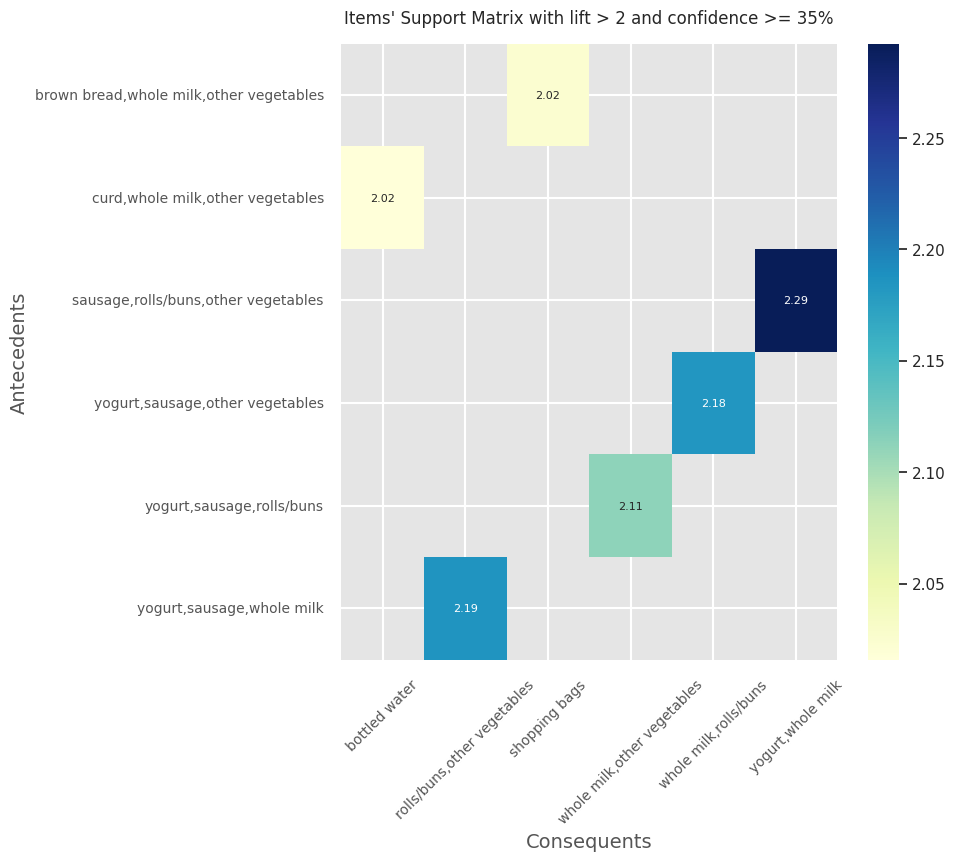

In [55]:
# Visualize
# plot a heatmap to know how strong the association is based on lift values
rules_sorted_fp['lhs items'] = rules_sorted_fp['antecedents'].apply(lambda x:len(x) )
rules_sorted_fp[rules_sorted_fp['lhs items'] >=2 ].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules_sorted_fp['antecedents_'] = rules_sorted_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_sorted_fp['consequents_'] = rules_sorted_fp['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_sorted_fp[rules_sorted_fp['lhs items']>2].pivot(index = 'antecedents_', 
                            columns = 'consequents_', values= 'lift')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(8, 8))
sns.set()

# Adjust the plot
ax = sns.heatmap(data=pivot, 
                 annot=True, 
                 fmt='.2f', 
                 cmap='YlGnBu', 
                 cbar=True, 
                 annot_kws={"fontsize": 8})
plt.title("Items' Support Matrix with lift > 2 and confidence >= 35%", 
          fontsize=12, 
          y=1.02)
ax.set_xlabel("Consequents",fontsize=14)
ax.set_ylabel("Antecedents",fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show() 

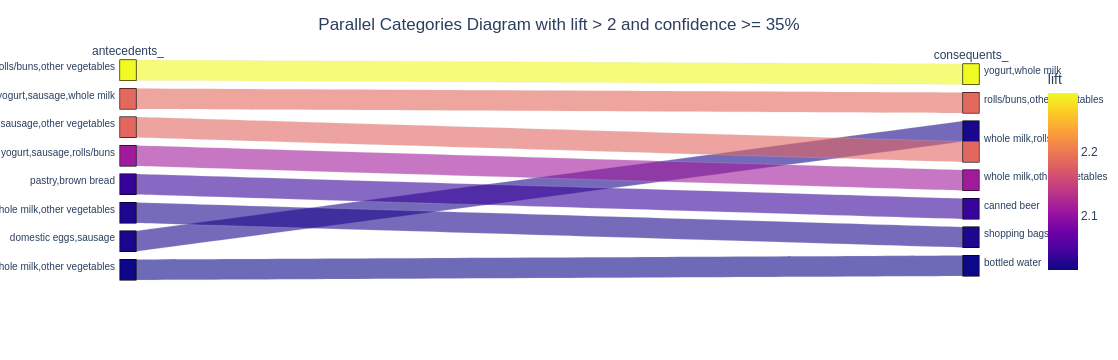

In [56]:
# Replace frozen sets with strings
rules_sorted_fp['antecedents_'] = rules_sorted_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_sorted_fp['consequents_'] = rules_sorted_fp['consequents'].apply(lambda a: ','.join(list(a)))

# Adjust the plot
fig = px.parallel_categories(rules_sorted_fp, 
                             dimensions=['antecedents_', 'consequents_'], 
                             color='lift')

# Update the layout
fig.update_layout(
    title='Parallel Categories Diagram with lift > 2 and confidence >= 35%',
    title_x=0.5,
    font=dict(size=12)
)

# Show the plot
fig.show()

In [57]:
rules_sorted_fp2 = rules_fp[(rules_fp['lift'] > 1) & (rules_fp['confidence'] >= 0.7) ].sort_values(by='lift', ascending=False).reset_index(drop=True) 
rules_sorted_fp2

antecedents   consequents  \
0              (chocolate, fruit/vegetable juice)  (whole milk)   
1            (domestic eggs, sausage, rolls/buns)  (whole milk)   
2  (bottled water, brown bread, other vegetables)  (whole milk)   
3                          (cream cheese, butter)  (whole milk)   
4              (yogurt, bottled beer, rolls/buns)  (whole milk)   
5           (yogurt, sausage, whipped/sour cream)  (whole milk)   
6              (yogurt, pastry, other vegetables)  (whole milk)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.013875            0.438592  0.010021    0.722222  1.646684   
1            0.013875            0.438592  0.010021    0.722222  1.646684   
2            0.016187            0.438592  0.011562    0.714286  1.628588   
3            0.014902            0.438592  0.010534    0.706897  1.611741   
4            0.018243            0.438592  0.012847    0.704225  1.605650   
5            0.014645            0.438592  0.010277    0.701754  1.600016   
6            0.024923            0.438592  0.017472    0.701031  1.598367   

   leverage  conviction  zhangs_metric  
0  0.003935    2.021069       0.398244  
1  0.003935    2.021069       0.398244  
2  0.004463    1.964928       0.392322  
3  0.003998    1.915392       0.385295  
4  0.004846    1.898094       0.384208  
5  0.003854    1.882368       0.380580  
6  0.006541    1.877813       0.383930

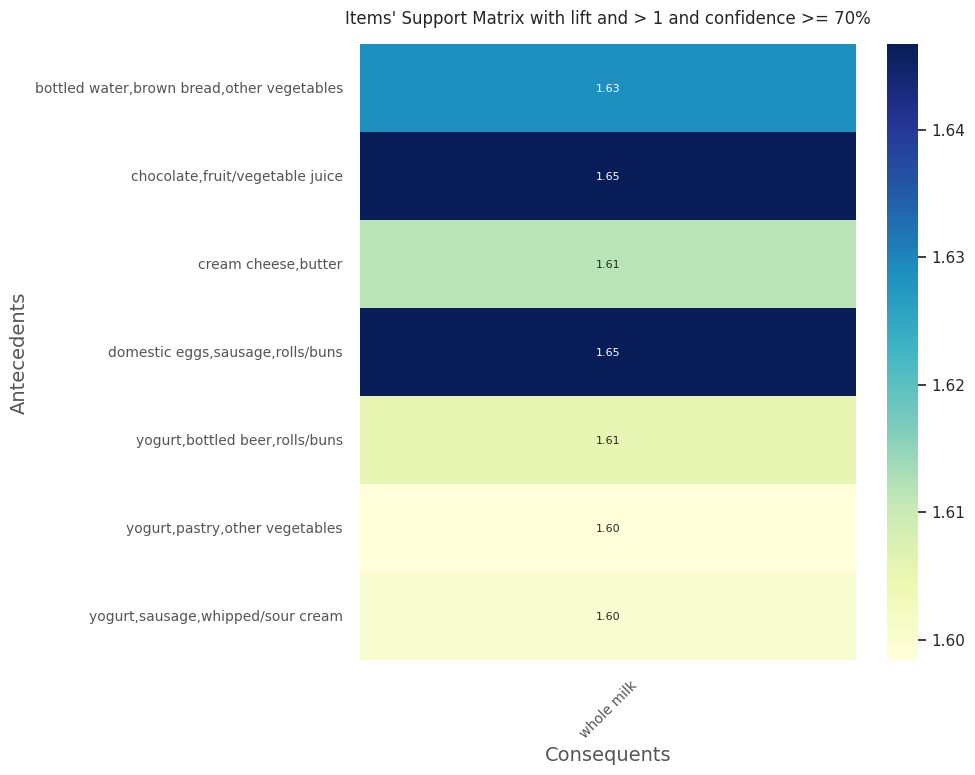

In [58]:
# plot a heatmap to know how strong the association is based on lift values
rules_sorted_fp2['lhs items'] = rules_sorted_fp2['antecedents'].apply(lambda x:len(x) )
rules_sorted_fp2[rules_sorted_fp2['lhs items'] >=1 ].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules_sorted_fp2['antecedents_'] = rules_sorted_fp2['antecedents'].apply(lambda a: ','.join(list(a)))
rules_sorted_fp2['consequents_'] = rules_sorted_fp2['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_sorted_fp2[rules_sorted_fp2['lhs items']>1].pivot(index = 'antecedents_', 
                        columns = 'consequents_', values= 'lift')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(8, 8))
sns.set()
ax = sns.heatmap(data=pivot, 
                 annot=True, 
                 fmt='.2f', 
                 cmap='YlGnBu', 
                 cbar=True, 
                 annot_kws={"fontsize": 8})
plt.title("Items' Support Matrix with lift and > 1 and confidence >= 70%", 
          fontsize=12, 
          y=1.02)
ax.set_xlabel("Consequents",fontsize=14)
ax.set_ylabel("Antecedents",fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show() 

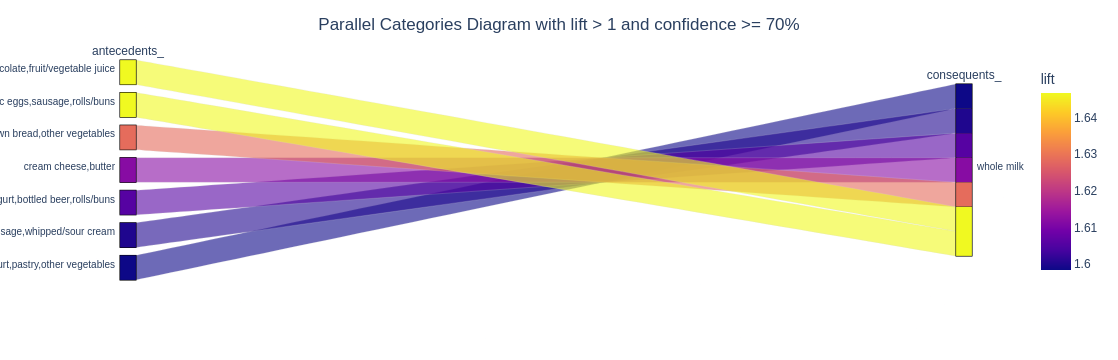

In [59]:
# Replace frozen sets with strings
rules_sorted_fp2['antecedents_'] = rules_sorted_fp2['antecedents'].apply(lambda a: ','.join(list(a)))
rules_sorted_fp2['consequents_'] = rules_sorted_fp2['consequents'].apply(lambda a: ','.join(list(a)))

# Adjust the plot
fig = px.parallel_categories(rules_sorted_fp2, 
                             dimensions=['antecedents_', 'consequents_'], 
                             color='lift')

# Update the layout
fig.update_layout(
    title='Parallel Categories Diagram with lift > 1 and confidence >= 70%',
    title_x=0.5,
    font=dict(size=12)
)

# Show the plot
fig.show()

In [60]:
# Calculating run time for apriori

warnings.filterwarnings('ignore')

l = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]
t_ap = []

for i in l:
    t1 = time.time()
    apriori(basket_sets, 
            min_support = i, 
            use_colnames = True)
    
    t2 = time.time()
    t_ap.append((t2 - t1) * 1000)

In [61]:
# Calculating run time for fp growth

warnings.filterwarnings('ignore')

l = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]
t_fp = []

for i in l:
    t1 = time.time()
    fpgrowth(basket_sets, 
             min_support = i, 
             use_colnames = True)
    
    t2 = time.time()
    t_fp.append((t2 - t1) * 1000)

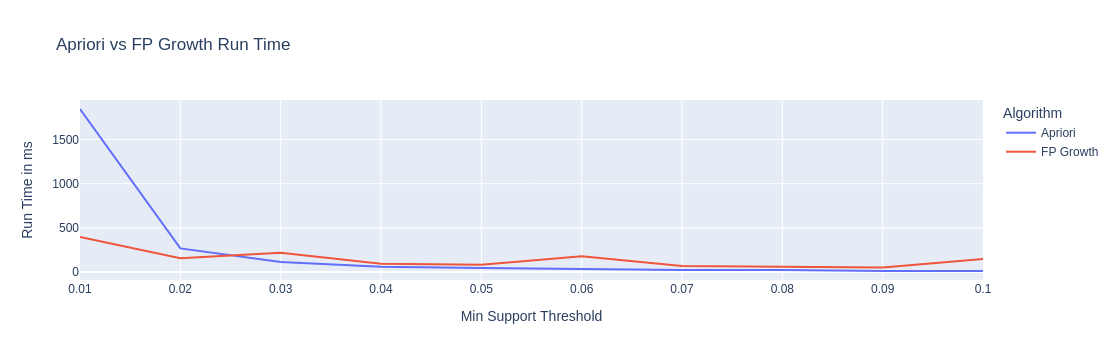

In [62]:
# Comparing time run of apriori and fp growth

# Set to DataFrame
time = pd.DataFrame({'Support Threshold': l, 
                     'Apriori': t_ap, 
                     'FP Growth': t_fp})
# Make the plot and adjust
fig = px.line(time, 
              x='Support Threshold', 
              y=['Apriori', 'FP Growth'], 
              labels={'value': 'Run Time in ms'}, 
              title='Apriori vs FP Growth Run Time')

# Adjust the layout
fig.update_layout(xaxis_title='Min Support Threshold', 
                  yaxis_title='Run Time in ms', 
                  legend_title='Algorithm')

# Show the plot
fig.show()